In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('training_set_features.csv')
train_df_labels = pd.read_csv('training_set_labels.csv')


In [3]:
train_df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [4]:
!pip install flaml
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
train_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [6]:
train_df.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [7]:
((train_df.isnull().sum() / len(train_df)) * 100).sort_values()

respondent_id                   0.000000
sex                             0.000000
hhs_geo_region                  0.000000
census_msa                      0.000000
race                            0.000000
age_group                       0.000000
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_antiviral_meds       0.265848
behavioral_outside_home         0.307036
behavioral_large_gatherings     0.325757
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_touch_face           0.479275
behavioral_avoidance            0.778822
household_children              0.932340
household_adults                0.932340
opinion_h1n1_risk               1.452803
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
health_worker                   3.010447
child_under_6_mo

In [8]:
train_df_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [9]:
categorical_columns = [
    'sex',
    'hhs_geo_region',
    'census_msa',
    'race',
    'age_group',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_antiviral_meds',
    'behavioral_outside_home',
    'behavioral_large_gatherings',
    'behavioral_touch_face',
    'behavioral_avoidance',
    'health_worker',
    'child_under_6_months',
    'chronic_med_condition',
    'education',
    'marital_status',
    'employment_status',
    'rent_or_own',
    'doctor_recc_h1n1',
    'doctor_recc_seasonal',
    'income_poverty'
]

numerical_columns = [
    'household_children',
    'household_adults',
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_risk',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    
]

In [10]:
train_df[categorical_columns]

,sex,hhs_geo_region,census_msa,race,age_group,behavioral_face_mask,behavioral_wash_hands,behavioral_antiviral_meds,behavioral_outside_home,behavioral_large_gatherings,...,health_worker,child_under_6_months,chronic_med_condition,education,marital_status,employment_status,rent_or_own,doctor_recc_h1n1,doctor_recc_seasonal,income_poverty
0,Female,oxchjgsf,Non-MSA,White,55 - 64 Years,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,< 12 Years,Not Married,Not in Labor Force,Own,0.0,0.0,Below Poverty
1,Male,bhuqouqj,"MSA, Not Principle City",White,35 - 44 Years,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,12 Years,Not Married,Employed,Rent,0.0,0.0,Below Poverty
2,Male,qufhixun,"MSA, Not Principle City",White,18 - 34 Years,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,College Graduate,Not Married,Employed,Own,NaN,NaN,"<= $75,000, Above Poverty"
3,Female,lrircsnp,"MSA, Principle City",White,65+ Years,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,12 Years,Not Married,Not in Labor Force,Rent,0.0,1.0,Below Poverty
4,Female,qufhixun,"MSA, Not Principle City",White,45 - 54 Years,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,Some College,Married,Employed,Own,0.0,0.0,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,Female,qufhixun,Non-MSA,White,65+ Years,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,Some College,Not Married,Not in Labor Force,Own,0.0,0.0,"<= $75,000, Above Poverty"
26703,Male,lzgpxyit,"MSA, Principle City",White,18 - 34 Years,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,College Graduate,Not Married,Employed,Rent,1.0,1.0,"<= $75,000, Above Poverty"
26704,Female,lzgpxyit,"MSA, Not Principle City",White,55 - 64 Years,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,Some College,Not Married,NaN,Own,0.0,0.0,NaN
26705,Female,lrircsnp,Non-MSA,Hispanic,18 - 34 Years,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Some College,Married,Employed,Rent,0.0,0.0,"<= $75,000, Above Poverty"


In [11]:
merged_train_df = train_df.merge(train_df_labels, how='inner', on='respondent_id')

In [12]:
train_df.shape

(26707, 36)

In [13]:
merged_train_df.shape

(26707, 38)

In [14]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [15]:
merged_train_df.employment_occupation.value_counts()

employment_occupation
xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: count, dtype: int64

In [16]:
merged_train_df.isnull().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [18]:
merged_train_df=merged_train_df.drop(['employment_occupation'],axis=1)
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [19]:
merged_train_df['h1n1_concern']=merged_train_df['h1n1_concern'].replace({0 :'Not at all concerned',
                                             1 : 'Not very concerned',
                                             2 :'Somewhat concerned',
                                             3 :'Very concerned'})
merged_train_df['h1n1_concern'].value_counts()

h1n1_concern
Somewhat concerned      10575
Not very concerned       8153
Very concerned           4591
Not at all concerned     3296
Name: count, dtype: int64

In [20]:
merged_train_df['h1n1_concern']=merged_train_df['h1n1_concern'].replace({'Not at all concerned':0,
                                             'Not very concerned':1,
                                             'Somewhat concerned':2,
                                             'Very concerned':3})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [21]:
merged_train_df['h1n1_knowledge']=merged_train_df['h1n1_knowledge'].replace({0 :'No knowledge',
                                             1 : 'A little knowledge',
                                             2 :'A lot of knowledge'})
merged_train_df['h1n1_knowledge'].value_counts()

h1n1_knowledge
A little knowledge    14598
A lot of knowledge     9487
No knowledge           2506
Name: count, dtype: int64

In [22]:
merged_train_df['h1n1_knowledge']=merged_train_df['h1n1_knowledge'].replace({'No knowledge':0,
                                             'A little knowledge':1,
                                             'A lot of knowledge':2})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [23]:
merged_train_df[['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
    'child_under_6_months', 'health_worker',
       'health_insurance','chronic_med_condition']]=merged_train_df[['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
    'child_under_6_months', 'health_worker',
       'health_insurance','chronic_med_condition']].replace({0:False,1:True})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [24]:
merged_train_df['opinion_h1n1_vacc_effective']=merged_train_df['opinion_h1n1_vacc_effective'].replace({1:'Not at all effective',
                                                                           2 : 'Not very effective',
                                                                           3 :"Don't know",
                                                                           4 : 'Somewhat effective',
                                                                           5 :'Very effective'})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [25]:
merged_train_df['opinion_h1n1_vacc_effective']=merged_train_df['opinion_h1n1_vacc_effective'].replace({'Not at all effective':0,
                                                                           'Not very effective':1,
                                                                           "Don't know":2,
                                                                           'Somewhat effective':3,
                                                                           'Very effective':4})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [26]:
merged_train_df['opinion_h1n1_risk']=merged_train_df['opinion_h1n1_risk'].replace({1:'Very Low',
                                                                           2 : 'Somewhat low',
                                                                           3 :"Don't know",
                                                                           4 : 'Somewhat high',
                                                                           5 :'Very high'})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [27]:
merged_train_df['opinion_h1n1_risk']=merged_train_df['opinion_h1n1_risk'].replace({'Very Low':0,
                                                                          'Somewhat low':1,
                                                                           "Don't know":2,
                                                                           'Somewhat high':3,
                                                                          'Very high':4})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [28]:
merged_train_df['opinion_h1n1_sick_from_vacc']=merged_train_df['opinion_h1n1_sick_from_vacc'].replace({1:'Not at all worried',
                                                                           2 : 'Not very worried',
                                                                           3 :"Don't know",
                                                                           4 : 'Somewhat worried',
                                                                           5 :'Very worried'})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [29]:
merged_train_df['opinion_h1n1_sick_from_vacc']=merged_train_df['opinion_h1n1_sick_from_vacc'].replace({'Not at all worried':0,
                                                                           'Not very worried':1,
                                                                           "Don't know":2,
                                                                           'Somewhat worried':3,
                                                                           'Very worried':4})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [30]:
merged_train_df['opinion_seas_vacc_effective']=merged_train_df['opinion_seas_vacc_effective'].replace({1:'Not at all effective',
                                                                           2 : 'Not very effective',
                                                                           3 :"Don't know",
                                                                           4 : 'Somewhat effective',
                                                                           5 :'Very effective'})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [31]:
merged_train_df['opinion_seas_vacc_effective']=merged_train_df['opinion_seas_vacc_effective'].replace({'Not at all effective':0,
                                                                           'Not very effective':1,
                                                                          "Don't know":2,
                                                                           'Somewhat effective':3,
                                                                           'Very effective':4})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [32]:
merged_train_df['opinion_seas_risk']=merged_train_df['opinion_seas_risk'].replace({1:'Very Low',
                                                                           2 : 'Somewhat low',
                                                                           3 :"Don't know",
                                                                           4 : 'Somewhat high',
                                                                           5 :'Very high'})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [33]:
merged_train_df['opinion_seas_sick_from_vacc']=merged_train_df['opinion_seas_sick_from_vacc'].replace({1:'Not at all worried',
                                                                           2 : 'Not very worried',
                                                                           3 :"Don't know",
                                                                           4 : 'Somewhat worried',
                                                                           5 :'Very worried'})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [34]:
merged_train_df['opinion_seas_sick_from_vacc']=merged_train_df['opinion_seas_sick_from_vacc'].replace({'Not at all worried':0,
                                                                           'Not very worried':1,
                                                                           "Don't know":2,
                                                                           'Somewhat worried':3,
                                                                           'Very worried':4})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [35]:
merged_train_df['age_group'].value_counts()

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [36]:
merged_train_df['age_group']=merged_train_df['age_group'].replace({'55 - 64 Years':3, '35 - 44 Years':1, '18 - 34 Years':0, '65+ Years':4,
       '45 - 54 Years':2})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [37]:
merged_train_df['education'].value_counts()

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

In [38]:
merged_train_df['education']=merged_train_df['education'].replace({'< 12 Years':0, '12 Years':1, 'College Graduate':3, 'Some College':2})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [39]:
merged_train_df['income_poverty']=merged_train_df['income_poverty'].replace({'Below Poverty':0, '<= $75,000, Above Poverty':1, '> $75,000':2})
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [40]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  object 
 4   behavioral_avoidance         26499 non-null  object 
 5   behavioral_face_mask         26688 non-null  object 
 6   behavioral_wash_hands        26665 non-null  object 
 7   behavioral_large_gatherings  26620 non-null  object 
 8   behavioral_outside_home      26625 non-null  object 
 9   behavioral_touch_face        26579 non-null  object 
 10  doctor_recc_h1n1             24547 non-null  object 
 11  doctor_recc_seasonal         24547 non-null  object 
 12  chronic_med_condition        25736 non-null  object 
 13  child_under_6_mo

In [41]:
both_vax_ratio = merged_train_df[(merged_train_df['h1n1_vaccine']==1) & (merged_train_df['seasonal_vaccine']==1)].shape[0] / merged_train_df.shape[0]
either_vax_ratio = merged_train_df[(merged_train_df['h1n1_vaccine']==1) | (merged_train_df['seasonal_vaccine']==1)].shape[0] / merged_train_df.shape[0]
print("Percentage of respondents who received both vaccines: ", "{:.2%}".format(both_vax_ratio))
print("Percentage of respondents who received one of the vaccines: ", "{:.2%}".format(either_vax_ratio))

Percentage of respondents who received both vaccines:  17.59%
Percentage of respondents who received one of the vaccines:  50.22%


In [42]:
print(merged_train_df['h1n1_vaccine'].value_counts())
print(merged_train_df['seasonal_vaccine'].value_counts())

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64
seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64


In [43]:
all_cols = merged_train_df.columns.tolist()

opinion_cols = []
for col in merged_train_df.columns.tolist():
    if col.startswith("opinion"):
        opinion_cols.append(col)

In [44]:
binary_cols = []
for col in merged_train_df.columns.tolist():
    if merged_train_df[col].nunique() <= 2:
        binary_cols.append(col)

In [45]:
household_cols = []
for col in merged_train_df.columns.tolist():
    if col.startswith("household"):
        household_cols.append(col)

In [46]:
def make_stacked_chart(df, col, vaccine):
    df_grouped = pd.DataFrame(df.groupby(col)[vaccine].value_counts())
    df_grouped.columns = ['count']
    df_grouped = df_grouped.reset_index()
    
    pivot_df = df_grouped.pivot(index=[col], columns=vaccine, values=['count']).reset_index()
    
    pivot_df.set_index(col).plot(kind='bar', stacked=True, color=['steelblue', 'darkorange'])
    plt.title(f'Stacked Bar Chart {col}')
    plt.legend(['Non-vaccinated', 'Vaccinated'])
    plt.ylabel('Count')
    plt.show()
    
def make_group_barcharts(df, col_list, nrows, ncols, vaccine, tight=False, figx=16, figy=36):
    fig = plt.figure(figsize=(figx, figy))

    for i, col in enumerate(col_list):
        ax = plt.subplot(nrows, ncols, i+1)
        df_grouped = pd.DataFrame(df.groupby(col)[vaccine].value_counts())
        df_grouped.columns = ['count']
        df_grouped = df_grouped.reset_index()
    
        pivot_df = df_grouped.pivot(index=[col], columns=vaccine, values=['count']).reset_index()
    
        pivot_df.set_index(col).plot(kind='bar', stacked=True, color=['steelblue', 'darkorange'], ax = ax)
        plt.title(f'Stacked Bar Chart {col}')
        plt.legend(['Non-vaccinated', 'Vaccinated'])
        plt.ylabel('Count')
        
    if tight:
        plt.tight_layout()

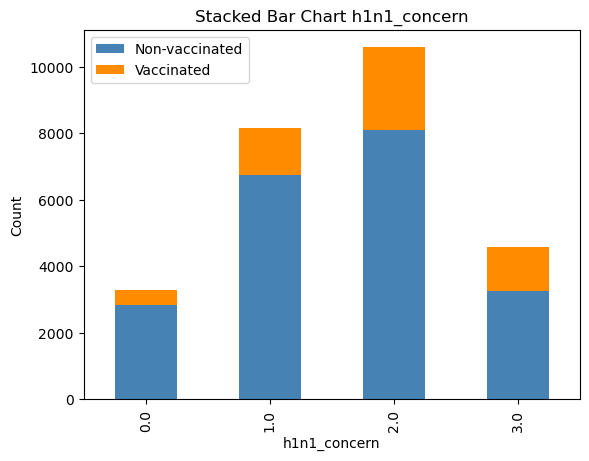

In [47]:
make_stacked_chart(merged_train_df, 'h1n1_concern', vaccine='h1n1_vaccine') 

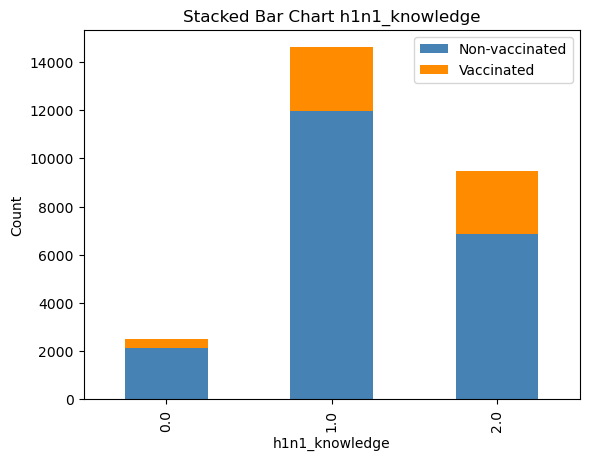

In [48]:
make_stacked_chart(merged_train_df, 'h1n1_knowledge', vaccine='h1n1_vaccine')

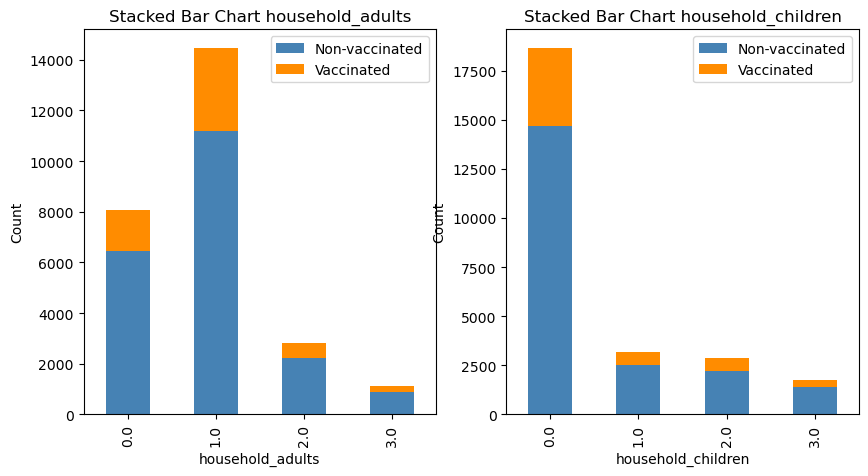

In [49]:
make_group_barcharts(merged_train_df, household_cols, nrows=1, ncols=2, vaccine='h1n1_vaccine', figx=10, figy=5)

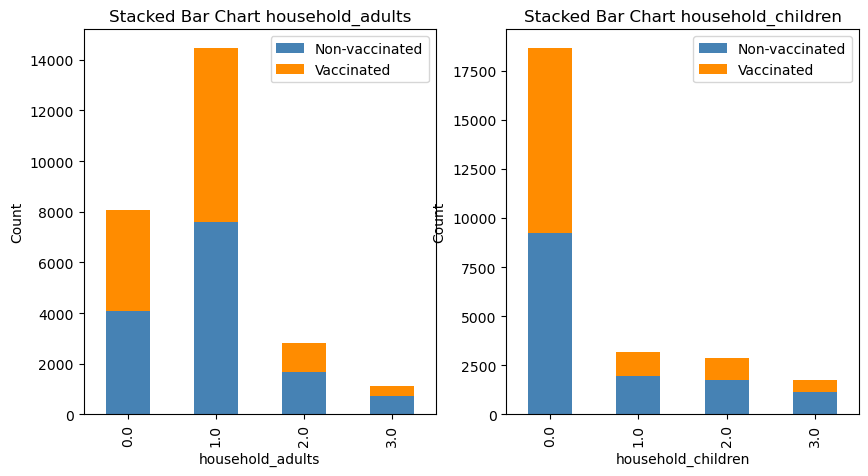

In [50]:
make_group_barcharts(merged_train_df, household_cols, nrows=1, ncols=2, vaccine='seasonal_vaccine', figx=10, figy=5)

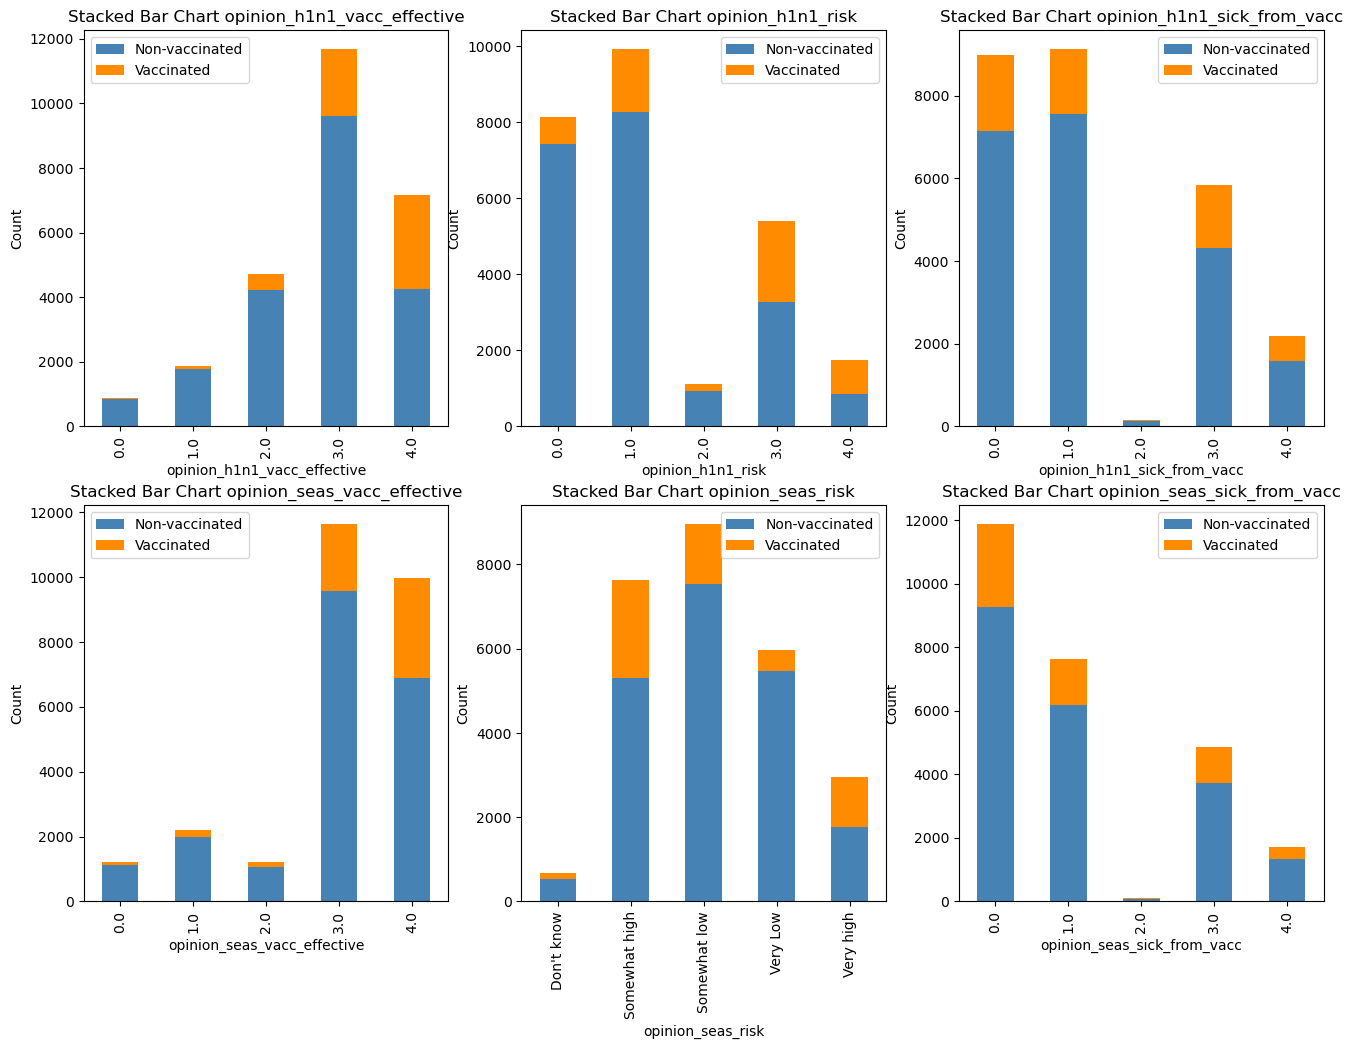

In [51]:
make_group_barcharts(merged_train_df, opinion_cols, nrows=6, ncols=3, vaccine='h1n1_vaccine')

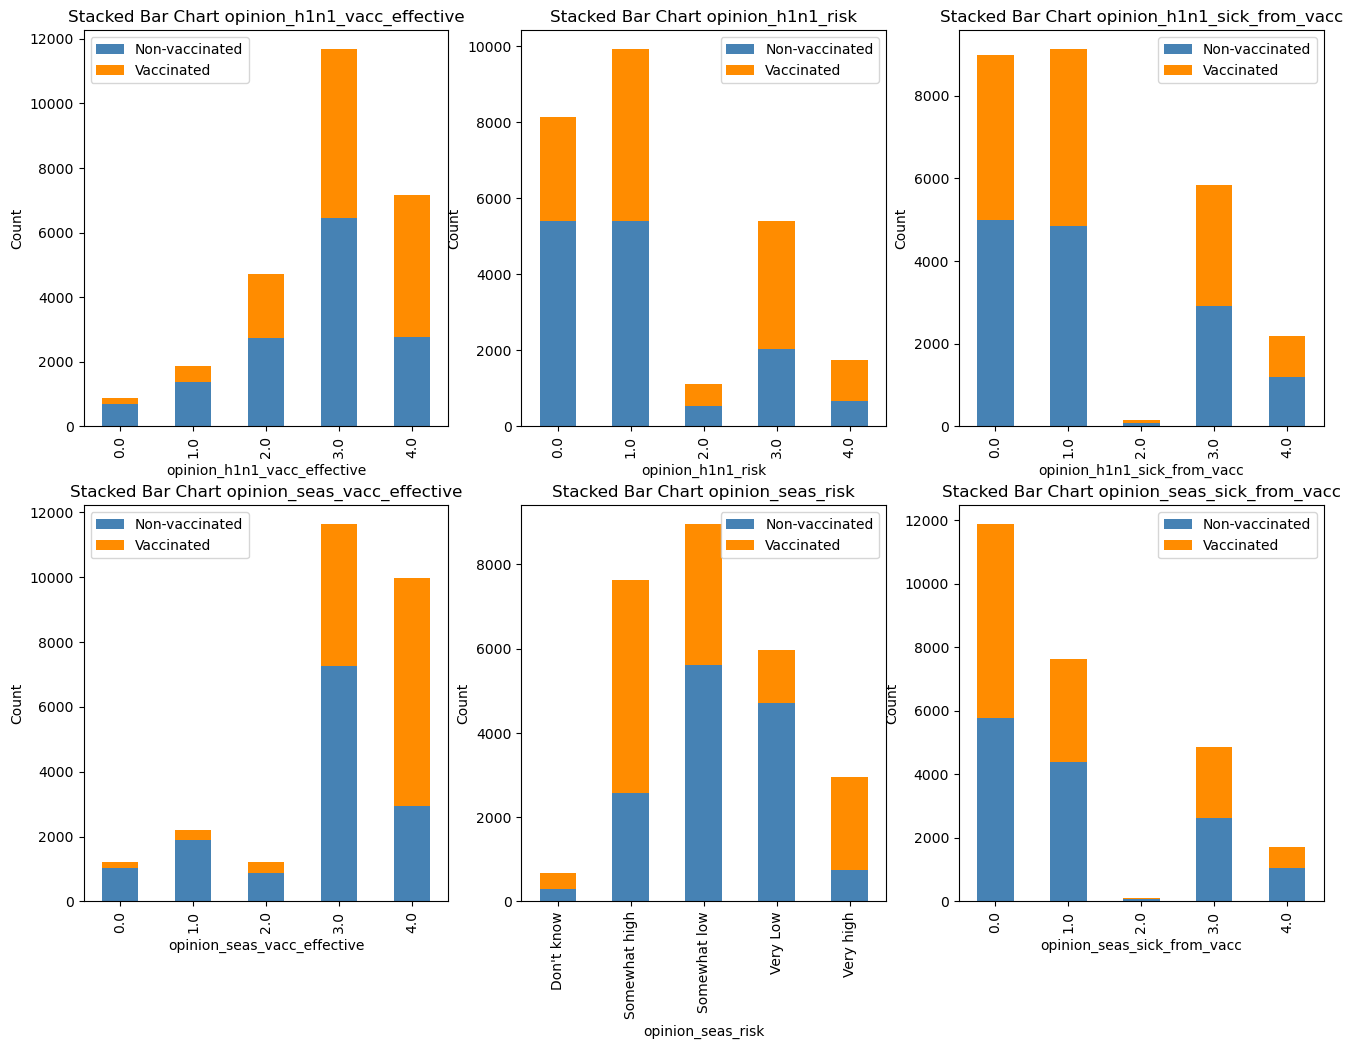

In [52]:
make_group_barcharts(merged_train_df, opinion_cols, nrows=6, ncols=3, vaccine='seasonal_vaccine')

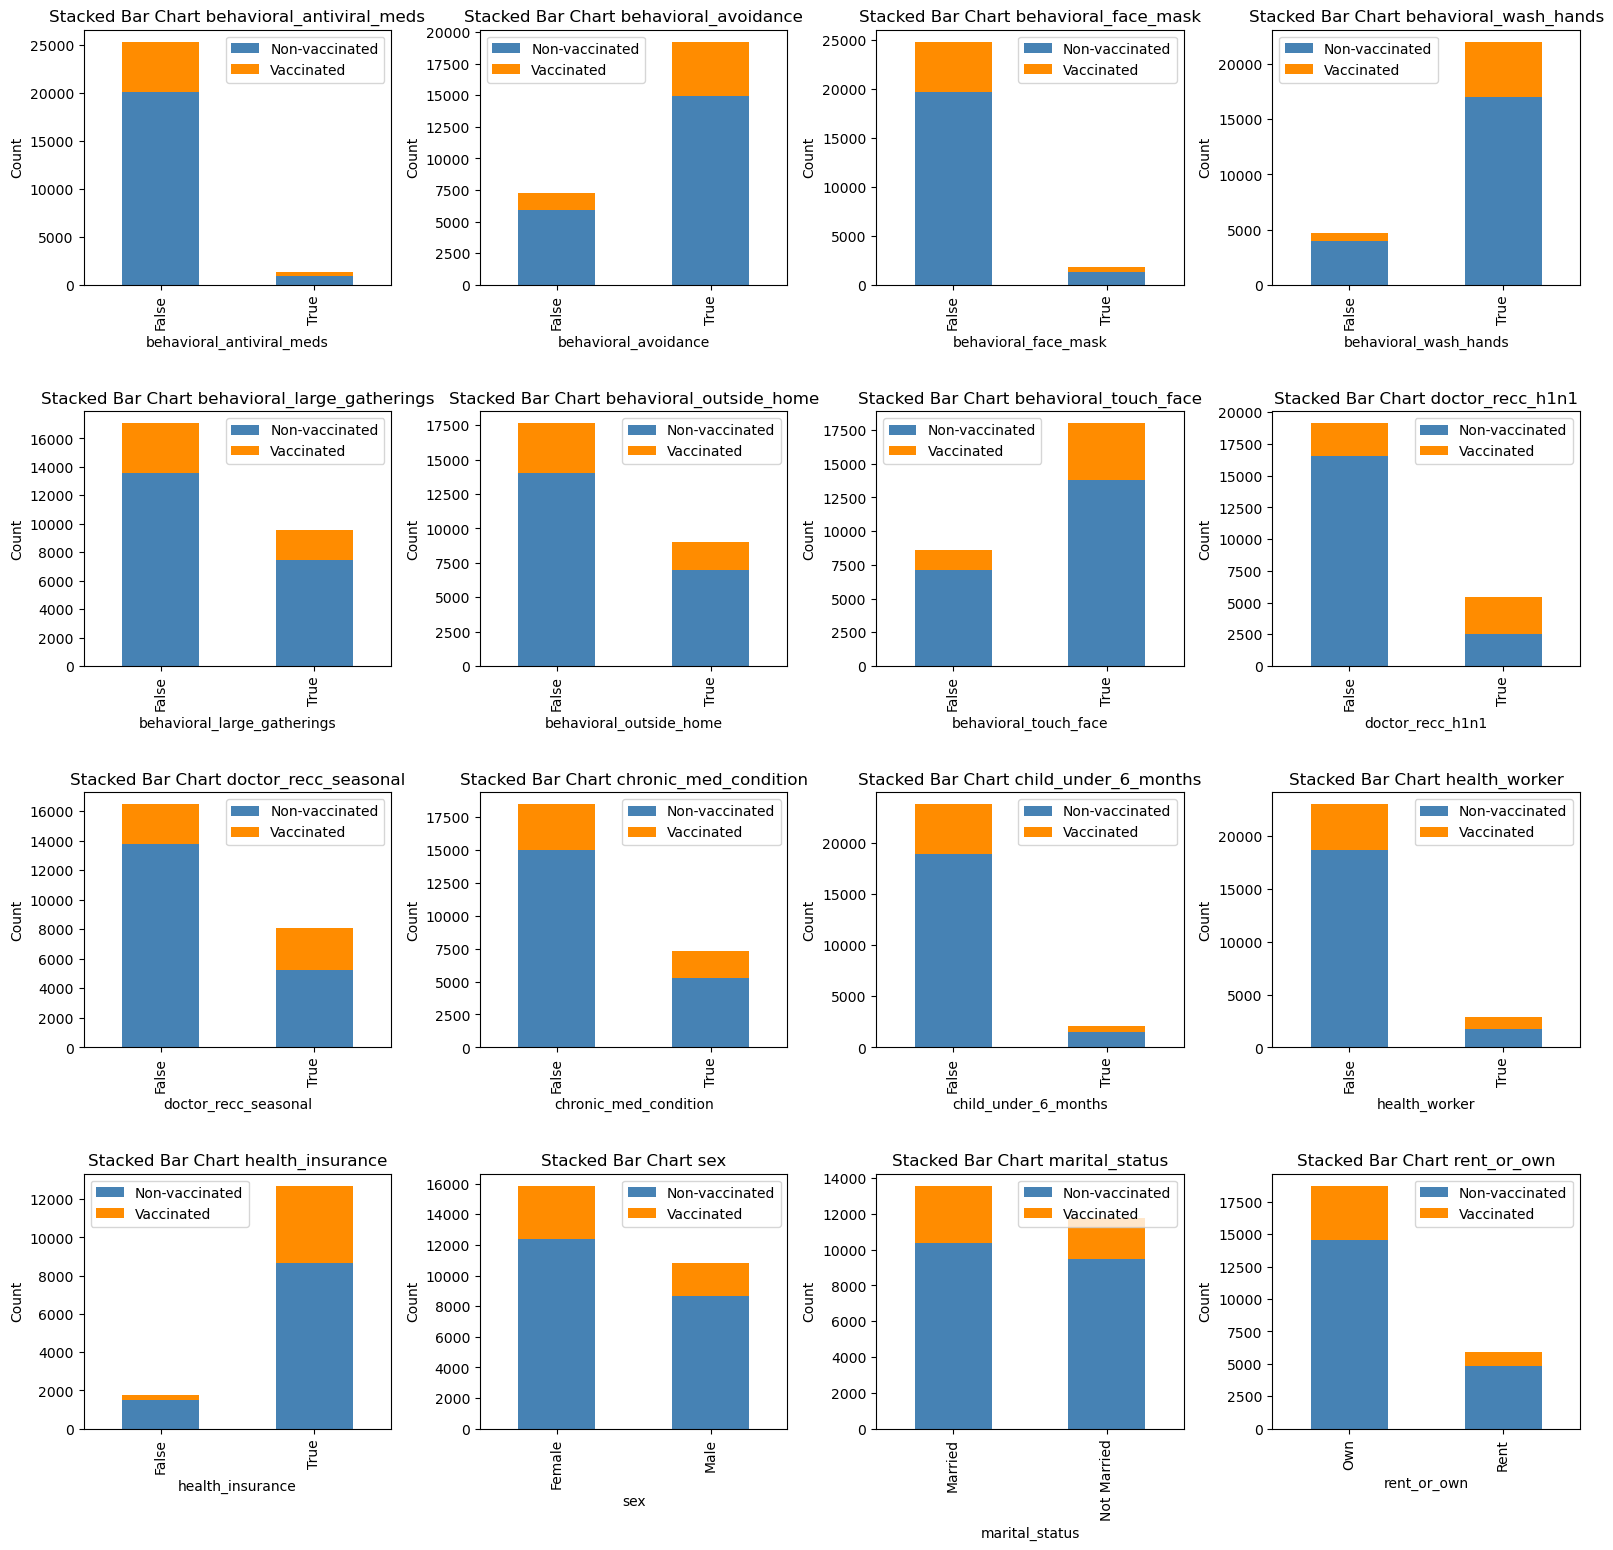

In [53]:
make_group_barcharts(merged_train_df, binary_cols[:-2], nrows=12, ncols=4, vaccine='h1n1_vaccine', tight=True, figx=16, figy=45)

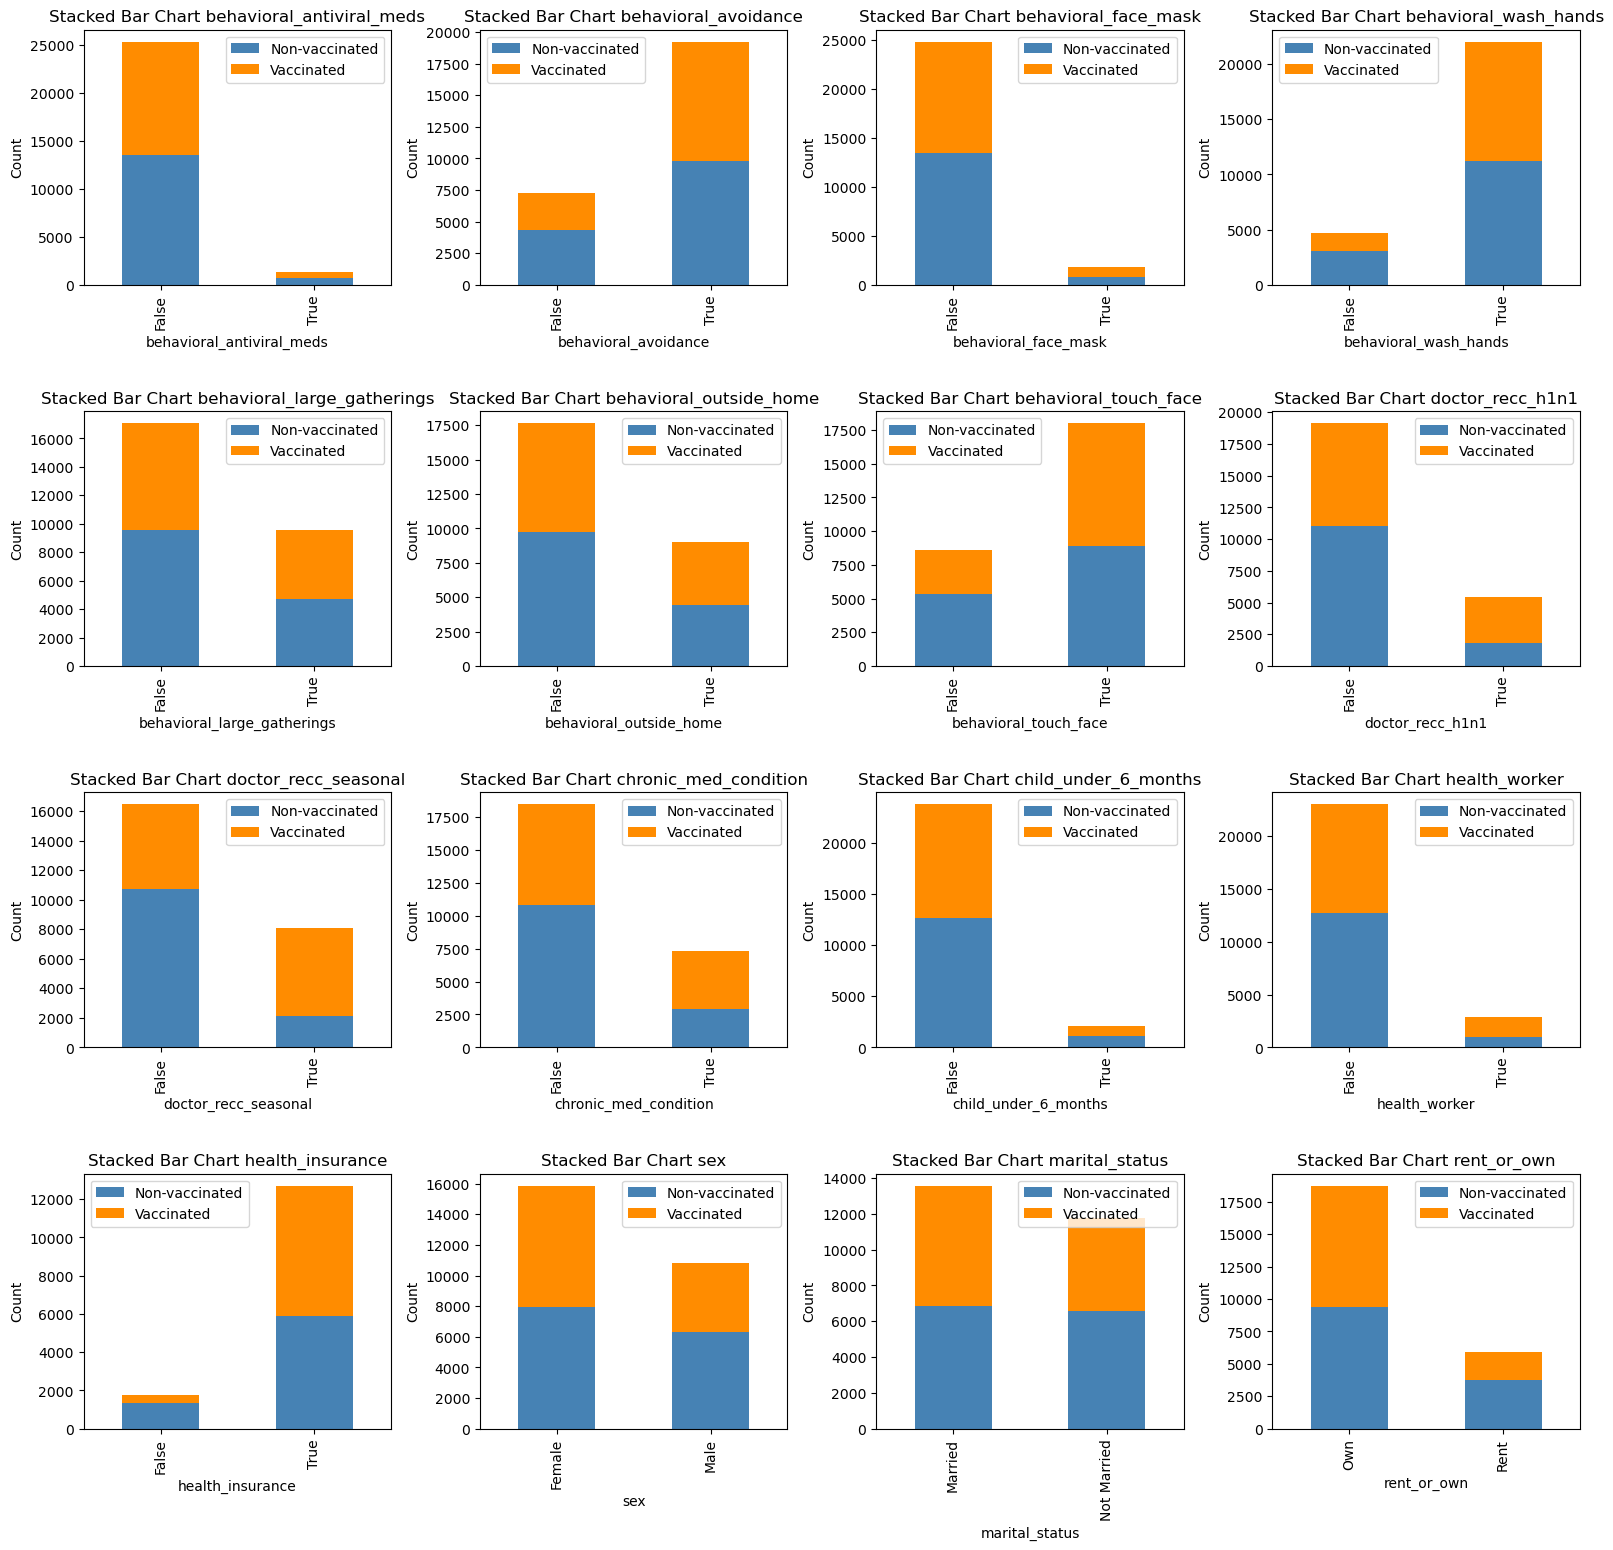

In [54]:
make_group_barcharts(merged_train_df, binary_cols[:-2], nrows=12, ncols=4, vaccine='seasonal_vaccine', tight=True, figx=16, figy=45)